# Performing Sentimental Ananlysis on Amazon Reviews
## Pradeep Reddy Oruganti

In [ ]:
# Import the libraries
import numpy as np  #for numerical operations
import matplotlib.pyplot as plt  #for plotting
import pandas as pd    #for data analysis and manipulation
import csv    #for reading and writing csv files
import seaborn as sns     #for data visualization
import os
from sklearn.model_selection import train_test_split     #for splitting the data to train and test set
from sklearn.naive_bayes import GaussianNB    #importing gaussian naive bayes
from sklearn.metrics import accuracy_score    #for calculating the accuracy score
from sklearn.metrics import precision_score   #for precision score
from sklearn.metrics import recall_score      #for recall score
from sklearn.metrics import f1_score,confusion_matrix    #for confusion matrix and f1 score
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier    #importing knn from sklearn

from sklearn.model_selection  import cross_val_score       
from collections import Counter

from sklearn import model_selection
from sklearn.metrics import roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')            #mounting the files required to google drive

Mounted at /content/drive


In [ ]:
os.getcwd()     #checking the current working directory

'/content'

In [ ]:
os.chdir("/content/drive/MyDrive")         #changing the directory

## **Exploratory Data Analysis**

In [ ]:
# Read the data
df = pd.read_csv('Reviews.csv')

In [ ]:
df.head()   #prints first 5 elements of dataframe

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df  #printing the dataframe 

#Before dropping 568454 rows

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
print('The number of entries in the data frame: ', df.shape[0])    #total number of rows in dataframe

The number of entries in the data frame:  568454


In [ ]:
df['ProductId'].nunique()       #checking the unique ProductId values

74258

In [ ]:
df['UserId'].nunique()      #checking the unique UserId values

256059

##### Check for full values

In [ ]:
df.isnull().sum()        #check for null values in each column

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
# drop the rows with null values
df.dropna(inplace=True)

In [ ]:
# recheck if null values are dropped
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

##### Neutral reviews
###### Dropped the rows where score = 3 because neutral reviews don't provide value to the prediction

In [ ]:
df1 = df[df['Score'] != 3]       #Here I have dropped the rows which has score as 3 and storing in new dataframe as df1

In [ ]:
df1   #pritting the new dataframe

#After dropping 525773 rows

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


Target Variable

Next we create a column called positivity where any score above 3 is encoded as 1 otherwise 0

In [ ]:
df1['Positivity'] = np.where(df1['Score'] > 3, 1, 0)       #creating a new column called 'Positivity' basaed on the score values
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [ ]:
#Sorting data using quicksort according to ProductId in ascending order
 
sorted_df = df1.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
sorted_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positivity
150522,150523,0006641040,A2P4F2UO0UMP8C,"Elizabeth A. Curry ""Lovely Librarian""",0,0,4,1096675200,MMMM chicken soup....,Summary: A young boy describes the usefulness...,1
150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,4,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,1
150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,4,1210809600,A classic,Get the movie or sound track and sing along wi...,1
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,4,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",1
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,4,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,1
...,...,...,...,...,...,...,...,...,...,...,...
191720,191721,B009UOFTUI,AJVB004EB0MVK,D. Christofferson,0,0,1,1345852800,weak coffee not good for a premium product and...,"This coffee supposedly is premium, it tastes w...",0
1477,1478,B009UOFU20,AJVB004EB0MVK,D. Christofferson,0,0,1,1345852800,weak coffee not good for a premium product and...,"This coffee supposedly is premium, it tastes w...",0
328481,328482,B009UUS05I,ARL20DSHGVM1Y,Jamie,0,0,5,1331856000,Perfect,The basket was the perfect sympathy gift when ...,1
5702,5703,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,5,1351209600,DELICIOUS,Purchased this product at a local store in NY ...,1


In [ ]:
#Deduplication of entries

df2 = sorted_df.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
df2

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positivity
150522,150523,0006641040,A2P4F2UO0UMP8C,"Elizabeth A. Curry ""Lovely Librarian""",0,0,4,1096675200,MMMM chicken soup....,Summary: A young boy describes the usefulness...,1
150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,4,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,1
150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,4,1210809600,A classic,Get the movie or sound track and sing along wi...,1
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,4,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",1
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,4,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,1
...,...,...,...,...,...,...,...,...,...,...,...
193175,193176,B009RSR8HO,A76WHW051R3KV,"Shawn ""Shawn""",0,0,5,1350432000,My #1 Sweetener of choice,What a wonderful product! It's perfect to use ...,1
188388,188389,B009SF0TN6,A1L0GWGRK4BYPT,Bety Robinson,0,0,5,1350518400,Amazing!! Great sauce for everything!,You have to try this sauce to believe it! It s...,1
221794,221795,B009SR4OQ2,A32A6X5KCP7ARG,sicamar,1,1,5,1350604800,Awesome Taste,I bought this Hazelnut Paste (Nocciola Spread)...,1
5702,5703,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,5,1351209600,DELICIOUS,Purchased this product at a local store in NY ...,1


In [ ]:
#How many positive and negative reviews are present in our dataset?
df2['Score'].value_counts()

5    250960
4     56096
1     36304
2     20801
Name: Score, dtype: int64

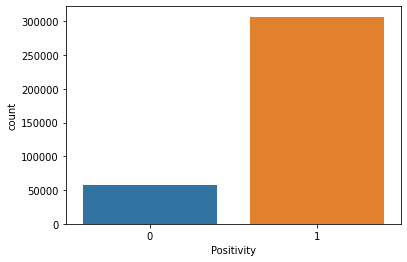

In [ ]:
sns.countplot(df2['Positivity'])       #plot to show count of positive and negative reviews
plt.show()

In [ ]:
df2.shape      #checking the shape of df2 dataframe

(364161, 11)

In [ ]:
df3 = df2
df3.shape

(364161, 11)

In [ ]:
df3['Positivity'].value_counts()   #checking the total count of Positivity values

1    307056
0     57105
Name: Positivity, dtype: int64

In [ ]:
df3_negative = df3[df3['Positivity'] == 0]
df3_negative.shape                           #gives the shape and defines the negative reviews

(57105, 11)

In [ ]:
df3_positive = df3[df3['Positivity'] == 1]
df3_positive.shape                           #gives the shape and defines the positive reviews

(307056, 11)

##### Here we are taking the random sample of 10000 from total positive and negative reviews respectively. The reason we have taken is as the it contains large data the system got crashed and we need to rerun all the chuncks again. Instead we have taken the random 10000 samples.

In [ ]:
df3_p = df3_positive.sample(n=10000)        #taking the random 10000 sample of positive reviews and storing it in df3_p

In [ ]:
df3_p.shape      #checking the shape of df3_p

(10000, 11)

In [ ]:
df3_n = df3_negative.sample(n=10000)        #taking the random 10000 sample of negative reviews and storing it in df3_p

In [ ]:
final_df= pd.concat([df3_n,df3_p],ignore_index=True)    #concating the both positive and negative reviews dataframe

In [ ]:
final_df = final_df.sample(frac=1).reset_index(drop=True)      #it helps in shuflling the index of dataframe 


# https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows

In [ ]:
final_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positivity
0,468690,B002GWHDZA,ADYZC5B1QMSEY,saw110352,0,1,2,1322438400,mis leading,At first glance it appears that you will be ge...,0
1,407530,B00434CB74,A2Q61WN71B1MR5,old student,1,12,2,1304553600,Red Star Champagne Yeast (10 Packs) Dried Yeast,I purchased this product through Amazon to res...,0
2,119522,B0041LHND6,A17206I6DKR09B,"Paula Dawson ""Paula""",0,3,5,1255910400,excellent but expensive,The Nylabone durable chew is great for power c...,1
3,143912,B002HFLDJ8,A13HRSMJ5TOWEZ,IrishFire,0,0,5,1313366400,This is my favorite decaf green!,You can still get more flavor in a fully caffe...,1
4,202424,B002VL66C2,A24WXGEQFWMOBJ,"M. Johnson ""delight""",1,1,5,1263340800,Great mints. The power is worth the price!,"Bendicks bittermints are delicious, and the co...",1


In [ ]:
final_df[['Positivity']]       #checking the Positivity column of final_df

,Positivity
0,0
1,0
2,1
3,1
4,1
...,...
19995,1
19996,0
19997,0
19998,1


In [ ]:
final_df['Positivity'].value_counts()     #count the total values of Positivity column with 0 and 1 labels

1    10000
0    10000
Name: Positivity, dtype: int64

In [ ]:
final_df.to_csv('new_Final_df_marketing_project.csv',index=False)       #converting the final_df from dataframe to csv 

In [ ]:
final_df = pd.read_csv('new_Final_df_marketing_project.csv')        #loading the final_df dataframe

## **Text Processing**

In [ ]:
# Clean the text by removing any extra characters 

import re      #tools for cleaning text
import nltk    #library to perform NLP
nltk.download('stopwords')      #tool to remove the non-essential words. It is a list of words
from nltk.corpus import stopwords

# Stemming means taking the root of the word such as love from loved or loving
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# find sentences containing HTML tags

i=0;
for sent in final_df['Text'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

1
I purchased this product through Amazon to restart the fermentation process for orange wine. The yeast I began the process with failed to start. In looking for help I found this yeast that advertised as being good for restarting stuck processes. I had about 3 gallons of fruit to ferment. In order to save this I ordered this yeast. It took longer to get than other products I have ordered through Amazon, even after paying extra for expediting this ordered. I also paid more for this than I normally would but I paid the premium in hopes of saving the work already invested.<br />The yeast failed to restart the fermentation, however I don't know that it was the products fault.


In [ ]:
final_df['Text'][6]

"I repotted all my house plants with Miracle Gro last year.  All got gnats and earthworms (potted plants don't like earthworms). My plants were never so unhappy and sickly.  Not sure that it was the soil to blame, I repotted all the plants with a fresh bag of Miracle Gro in spring  (after soaking the roots in water bucket overnight to get rid of the earthworms).  Still have gnat and earthworm problems.<br />So it seems that Miracle Gro did not just stop screening the soil.  The mix was not heat-treated properly to kill larvae and stuff. Do not use this brand, unless you want unhappy plants, gnat infestation, and earthworms!"

In [ ]:
from bs4 import BeautifulSoup                    #for taking out data from HTML and XML files

soup = BeautifulSoup(final_df['Text'][6], 'lxml')
text = soup.get_text()
print(text)
print("="*50)

I repotted all my house plants with Miracle Gro last year.  All got gnats and earthworms (potted plants don't like earthworms). My plants were never so unhappy and sickly.  Not sure that it was the soil to blame, I repotted all the plants with a fresh bag of Miracle Gro in spring  (after soaking the roots in water bucket overnight to get rid of the earthworms).  Still have gnat and earthworm problems.So it seems that Miracle Gro did not just stop screening the soil.  The mix was not heat-treated properly to kill larvae and stuff. Do not use this brand, unless you want unhappy plants, gnat infestation, and earthworms!


In [ ]:
#re.sub('<.*?>', ' ', final_df['Text'][6])

In [ ]:
# https://stackoverflow.com/a/47091490/4084039

def breakdown(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
# https://gist.github.com/sebleier/554280
# Removed the words from the stop words list: 'no', 'nor', 'not'

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

##### Below steps taken from our ppt



```
`# This is formatted as code`
```

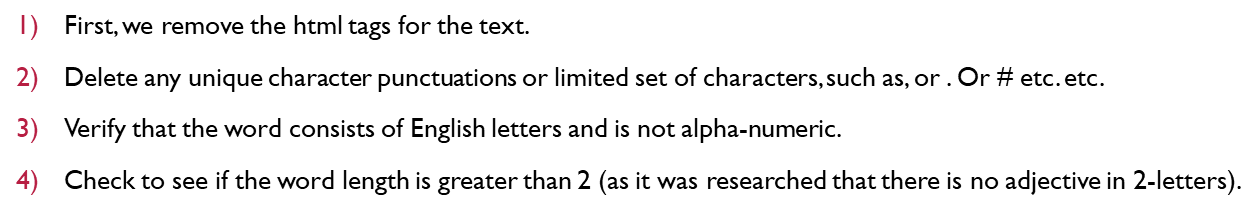

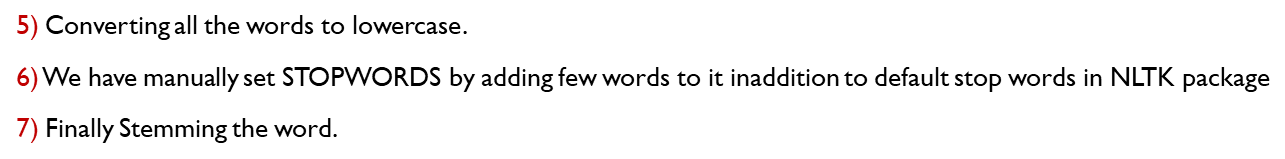

In [ ]:
from datetime import datetime    #using datetime for checking out how much time the chunk takes for compiling

start_time = datetime.now()

# Do the same steps for all the reviews in the dataset using the for loop

corpus = [] # Build a new list for all the words from all the reviews

# corpus is a collection of text and a common term used in NLP
for i in range (0, final_df.shape[0]):
    text1 = re.sub('<.*?>',' ', final_df['Text'][i])
    text1 = re.sub('[.|,|)|(|\|/]',' ', final_df['Text'][i])
    text1 = re.sub('[?|!|\'|"|#]',' ', final_df['Text'][i])
    text1 = re.sub('[^a-zA-Z]', ' ', final_df['Text'][i])
    text1= breakdown(text1)
    text1 = text1.lower()
    text1 = text1.split()
    
    ps = PorterStemmer()
    text1 = [ps.stem(word) for word in text1 if not  word in stopwords]
    text1 = ' '.join(text1)
    corpus.append(text1)
    

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:00:15.517549


In [ ]:
final_df['Text'][0]

'At first glance it appears that you will be getting 9 pounds of coffee,  how the shipping weight is 9 pounds,  only receive 5.5 pounds of coffee plus two heavy mugs.  This I believe is a mis representation of the product.  Coffee was o.k. but not outstanding.'

In [ ]:
corpus

['first glanc appear get pound coffe ship weight pound receiv pound coffe plu two heavi mug believ mi represent product coffe k not outstand',
 'purchas product amazon restart ferment process orang wine yeast began process fail start look help found yeast advertis good restart stuck process gallon fruit ferment order save order yeast took longer get product order amazon even pay extra expedit order also paid normal would paid premium hope save work alreadi invest yeast fail restart ferment howev know product fault',
 'nylabon durabl chew great power chewer like dog realli go safeti product problem not realiz buy pet product get free ship order dvd cd end pay doubl bone could purchas regular store less would nice could sort warn hint rule exsist would purchas live learn',
 'still get flavor fulli caffein green tea green clean refresh not bitter long pull tea bag min forgiven longer steep well flavor warm mellow grassi tone grassi tone not overwhelm light day tea good cold well sometim p

In [ ]:
corpus_df = pd.DataFrame(corpus,columns=['Reviews'])     #saving the corpus to dataframe with column name as Reviews

In [ ]:
corpus_df.to_csv('new_corpus.csv',index=False)         #converting corpus_df to csv

In [ ]:
final_df['Cleaned_text'] = corpus                #appending the Cleaned_text to final_df

In [ ]:
final_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positivity,Cleaned_text
0,468690,B002GWHDZA,ADYZC5B1QMSEY,saw110352,0,1,2,1322438400,mis leading,At first glance it appears that you will be ge...,0,first glanc appear get pound coffe ship weight...
1,407530,B00434CB74,A2Q61WN71B1MR5,old student,1,12,2,1304553600,Red Star Champagne Yeast (10 Packs) Dried Yeast,I purchased this product through Amazon to res...,0,purchas product amazon restart ferment process...
2,119522,B0041LHND6,A17206I6DKR09B,"Paula Dawson ""Paula""",0,3,5,1255910400,excellent but expensive,The Nylabone durable chew is great for power c...,1,nylabon durabl chew great power chewer like do...
3,143912,B002HFLDJ8,A13HRSMJ5TOWEZ,IrishFire,0,0,5,1313366400,This is my favorite decaf green!,You can still get more flavor in a fully caffe...,1,still get flavor fulli caffein green tea green...
4,202424,B002VL66C2,A24WXGEQFWMOBJ,"M. Johnson ""delight""",1,1,5,1263340800,Great mints. The power is worth the price!,"Bendicks bittermints are delicious, and the co...",1,bendick bittermint delici combin chocol mint a...


In [ ]:
final_df.to_csv("new_reviews.csv")       #saving the dataframe as csv

In [ ]:
final_df.shape

(20000, 12)

## **Bag of Words Model**

In [ ]:
# Create the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 2500)# Restricted the words to 2500 which keeps the most frequent words

In [ ]:
X = cv.fit_transform(final_df['Cleaned_text']).toarray()      # independent variables

In [ ]:
X.shape #  2500 words are features and 20000 rows as records.

(20000, 2500)

In [ ]:
print(cv.get_feature_names())       

['abil', 'abl', 'absolut', 'absorb', 'acai', 'accept', 'access', 'accident', 'accord', 'account', 'accur', 'achiev', 'acid', 'acquir', 'across', 'act', 'activ', 'actual', 'ad', 'add', 'addict', 'addit', 'address', 'adjust', 'admit', 'ador', 'adult', 'advantag', 'advertis', 'advic', 'advis', 'affect', 'afford', 'afraid', 'african', 'afternoon', 'aftertast', 'afterward', 'agav', 'age', 'ago', 'agre', 'ahead', 'ahoy', 'aid', 'air', 'al', 'ala', 'alcohol', 'allerg', 'allergi', 'allow', 'almond', 'almost', 'alon', 'along', 'alot', 'alreadi', 'also', 'altern', 'although', 'altoid', 'alway', 'amaz', 'amazingli', 'amazon', 'america', 'american', 'ami', 'among', 'amount', 'anchovi', 'anim', 'anni', 'annoy', 'anoth', 'answer', 'anti', 'anticip', 'antioxid', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'anywher', 'apart', 'apolog', 'appar', 'appeal', 'appear', 'appet', 'appetit', 'appl', 'applesauc', 'appli', 'appreci', 'appropri', 'approv', 'approxim', 'apricot', 'april', 'area', 'aroma', 'ar

In [ ]:
y=final_df['Positivity'].values         #dependent variables is y and Positivity values in it
y

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=143)       #splitting the data as train and test set
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3,random_state=143)      #splitting the data as validation and train set

In [ ]:
type(X_tr)               #checking the type of X_tr

numpy.ndarray

In [ ]:
type(y)                  #checking the type of y

numpy.ndarray

### **KNN Model**

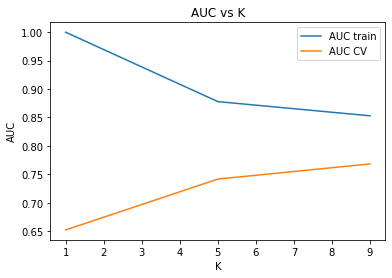

Duration: 0:32:07.459149


In [ ]:
from datetime import datetime # to check time taken to run this code

start_time = datetime.now()

auc_cv=[] # to store cross validate auc scores
auc_train=[] # to store train auc scores
K=list(range(1,10,4)) # for k = 1,5,9
cv_scores=[]
for i in K:
    knn=KNeighborsClassifier(n_neighbors=i) # initiating KNN classifier
    knn.fit(X_tr, y_tr) # fittinf train data
    pred = knn.predict_proba(X_cv)[:,1] # predicting for cross validation data
    auc_cv.append(roc_auc_score(y_cv,pred)) # appending roc scores to empty list
    pred1=knn.predict_proba(X_tr)[:,1] # predicting for test data
    auc_train.append(roc_auc_score(y_tr,pred1))       # appendig train auc scorees
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(K, auc_train, label='AUC train')
ax.plot(K, auc_cv, label='AUC CV')
plt.title('AUC vs K')
plt.xlabel('K')
plt.ylabel('AUC')
ax.legend()
plt.show()


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

In [ ]:
# Best K=5


model_knn=KNeighborsClassifier(n_neighbors=5)    #initiating knn classifier with k=5 

model_knn.fit(X_tr,y_tr)      #fitting the model with X_tr and y_tr

y_pred_k = model_knn.predict(X_test)       #predicting y_pred_k with X_test

In [ ]:
pip install scikit-plot         #Installing scikit-plot

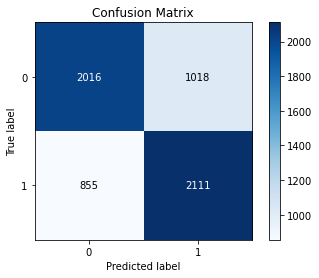

Accuracy: 0.687833
Precision: 0.674656
Recall: 0.711733
F1 Score: 0.692699


In [ ]:
import scikitplot as skplt        #importing scikitplot as skplt


accuracy_K = accuracy_score(y_test, y_pred_k)    #for accuracy of knn


precision_K = precision_score(y_test, y_pred_k)    #for precision of knn
 

recall_K = recall_score(y_test, y_pred_k)     #for recall of knn


f1_K = f1_score(y_test, y_pred_k)        #for f1_score of knn
 

# Make the Confusion Matrix

skplt.metrics.plot_confusion_matrix(y_test, y_pred_k)
plt.show() 

# Evaluate the results 

print('Accuracy: %f' % accuracy_K)
print('Precision: %f' % precision_K)
print('Recall: %f' % recall_K)
print('F1 Score: %f' % f1_K)

In [ ]:
type(X_tr)

numpy.ndarray

  Used pickel for serialization. It is a method to store\dump array's lists and dicts so were we can use them again with same variables.

In [ ]:
import pickle
with open('X_tr.pkl', 'wb') as f:
  pickle.dump(X_tr, f)

In [ ]:
with open('X_test.pkl', 'wb') as f:
  pickle.dump(X_test, f)

In [ ]:
with open('X_cv.pkl', 'wb') as f:
  pickle.dump(X_cv, f)

In [ ]:
with open('y_tr.pkl', 'wb') as f:
  pickle.dump(y_tr, f)

In [ ]:
with open('y_test.pkl', 'wb') as f:
  pickle.dump(y_test, f)

In [ ]:
with open('y_cv.pkl', 'wb') as f:
  pickle.dump(y_cv, f)

In [ ]:
# for opening a pick;e file
'''
with open('test.pkl', 'rb') as f:

  mynewlist = pickle.load(f)

'''  

#### **Support Vector Model**

In [ ]:
# Fitting classifier to the Training set
 
from sklearn.svm import SVC           # "Support Vector Classifier" 
 
model_S = SVC(kernel='rbf')    #initiating the svm model and kernel as rbf
model_S.fit(X_tr, y_tr)        #fitting the model with X_tr and y_tr

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_s = model_S.predict(X_test)        #predicting y_pred-s with X_test

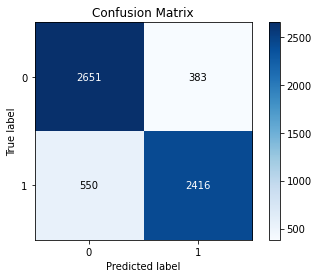

Accuracy: 0.844500
Precision: 0.863165
Recall: 0.814565
F1 Score: 0.838161


In [ ]:
accuracy_S = accuracy_score(y_test, y_pred_s)      #for accuracy of SVM

 
precision_S = precision_score(y_test, y_pred_s)     #for precision of SVM


recall_S = recall_score(y_test, y_pred_s)      #for recall of SVM


f1_S = f1_score(y_test, y_pred_s)         #for f1_score of SVM
 

# Make the Confusion Matrix

 
skplt.metrics.plot_confusion_matrix(y_test, y_pred_s)
plt.show()
 

# Evaluate the results


print('Accuracy: %f' % accuracy_S)
print('Precision: %f' % precision_S)
print('Recall: %f' % recall_S)
print('F1 Score: %f' % f1_S)

#### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier           #importing the randomforestclassifier 
 
model_Rf = RandomForestClassifier()        #initiating the model
model_Rf.fit(X_tr, y_tr)      #fitting the model 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rf = model_Rf.predict(X_test)      #predicting y_pred_rf using X_test

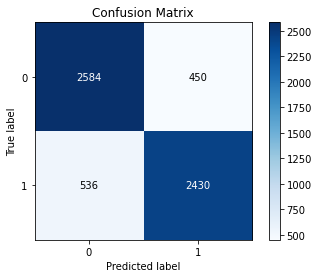

Accuracy: 0.835667
Precision: 0.843750
Recall: 0.819285
F1 Score: 0.831338


In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)       #for accuracy of Random forest


precision_rf = precision_score(y_test, y_pred_rf)    #for precision of Random forest


recall_rf = recall_score(y_test, y_pred_rf)         #for recall of Random forest


f1_rf = f1_score(y_test, y_pred_rf)                 #for f1-score of Random forest 


# Make the Confusion Matrix


skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf)
plt.show()


# Evaluate the results


print('Accuracy: %f' % accuracy_rf)
print('Precision: %f' % precision_rf)
print('Recall: %f' % recall_rf)
print('F1 Score: %f' % f1_rf)

#### **Decision Tree Classifier**


In [ ]:
from sklearn.tree import DecisionTreeClassifier       #importing the decision tree classifier
 
model_D = DecisionTreeClassifier()    #initiating the model
model_D.fit(X_tr, y_tr)              #fitting the model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_d = model_D.predict(X_test)      #predicting y_pred_d

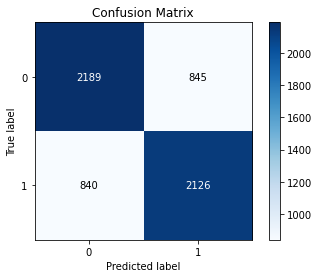

Accuracy: 0.719167
Precision: 0.715584
Recall: 0.716790
F1 Score: 0.716187


In [ ]:
accuracy_d = accuracy_score(y_test, y_pred_d)        #for accuracy of Decision Tree

 
precision_d = precision_score(y_test, y_pred_d)      #for precision of Decision Tree 

 
recall_d = recall_score(y_test, y_pred_d)            #for recall of Decision Tree


f1_d = f1_score(y_test, y_pred_d)                    #for F1-score of Decision Tree


# Make the Confusion Matrix


skplt.metrics.plot_confusion_matrix(y_test, y_pred_d)
plt.show()
 

# Evaluate the results

 
print('Accuracy: %f' % accuracy_d)
print('Precision: %f' % precision_d)
print('Recall: %f' % recall_d)
print('F1 Score: %f' % f1_d)

#### **Naive Bayes Model**

In [ ]:
X_tr1,X_test_1,y_tr1,y_test_1 = train_test_split(X,y,test_size=0.30,random_state=100)   #splitting the data

In [ ]:
from sklearn.naive_bayes import GaussianNB          #importing GaussianNB 

model_N = GaussianNB()           #initiating the model
model_N.fit(X_tr1,y_tr1)         #fitting the model

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb = model_N.predict(X_test_1)     #predicting the y_pred_nb

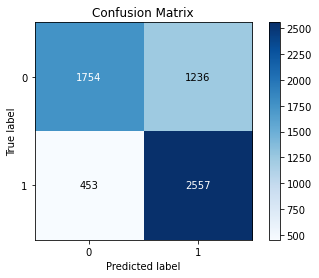

Accuracy: 0.718500
Precision: 0.674137
Recall: 0.849502
F1 Score: 0.751727


In [ ]:
accuracy_n = accuracy_score(y_test_1, y_pred_nb)         #for accuracy of naivebayes 

 
precision_n = precision_score(y_test_1, y_pred_nb)       #for precision of naivebayes 
 

recall_n = recall_score(y_test_1, y_pred_nb)             #for recall of naivebayes


f1_n = f1_score(y_test_1, y_pred_nb)                     #for f1-score of naivebayes
 

# Make the Confusion Matrix


skplt.metrics.plot_confusion_matrix(y_test_1, y_pred_nb)
plt.show()


# Evaluate the results


print('Accuracy: %f' % accuracy_n)
print('Precision: %f' % precision_n)
print('Recall: %f' % recall_n)
print('F1 Score: %f' % f1_n)

![1.PNG](attachment:1.PNG)

In [ ]:
os.getcwd()

'/content/drive/My Drive'

In [ ]:
os.chdir('/content/drive/MyDrive')

In [ ]:
n1 = pd.read_csv('new_reviews.csv')

In [ ]:
n1.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positivity,Cleaned_text
0,0,468690,B002GWHDZA,ADYZC5B1QMSEY,saw110352,0,1,2,1322438400,mis leading,At first glance it appears that you will be ge...,0,first glanc appear get pound coffe ship weight...
1,1,407530,B00434CB74,A2Q61WN71B1MR5,old student,1,12,2,1304553600,Red Star Champagne Yeast (10 Packs) Dried Yeast,I purchased this product through Amazon to res...,0,purchas product amazon restart ferment process...
2,2,119522,B0041LHND6,A17206I6DKR09B,"Paula Dawson ""Paula""",0,3,5,1255910400,excellent but expensive,The Nylabone durable chew is great for power c...,1,nylabon durabl chew great power chewer like do...
3,3,143912,B002HFLDJ8,A13HRSMJ5TOWEZ,IrishFire,0,0,5,1313366400,This is my favorite decaf green!,You can still get more flavor in a fully caffe...,1,still get flavor fulli caffein green tea green...
4,4,202424,B002VL66C2,A24WXGEQFWMOBJ,"M. Johnson ""delight""",1,1,5,1263340800,Great mints. The power is worth the price!,"Bendicks bittermints are delicious, and the co...",1,bendick bittermint delici combin chocol mint a...


### **Creating a TF-IDF Model**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # importing tf-idf vectorizer

# Below code will create 1-gram and 2-gram words. min_df is the threshold, we are telling to consider only words which have count of 100 and maximum features as 2500
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=100,max_features=2500) 
corpus1=tf_idf_vect.fit_transform(n1['Cleaned_text'].values) # transforming cleaned text
corpus1.shape

(20000, 1268)

In [ ]:
X_tf=corpus1 # assigning matrix to X_tf

In [ ]:
y_tf =n1['Positivity'].values # storing all label values

In [ ]:
y_tf # printing labels

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
# splitting data to train,cross validate and test.

Xtf_1, Xtf_test, ytf_1, ytf_test = train_test_split(X_tf, y_tf, test_size=0.3, random_state=143)
Xtf_tr, Xtf_cv, ytf_tr, ytf_cv = train_test_split(Xtf_1, ytf_1, test_size=0.3,random_state=143)

In [ ]:
Xtf_tr # X_tr should be a sparse matrix

<9800x1268 sparse matrix of type '<class 'numpy.float64'>'
	with 273219 stored elements in Compressed Sparse Row format>

### **Applying TF-IDF of various machine learning models**

#### **SVM Model**

In [ ]:
# Fitting classifier to the Training set
 
from sklearn.svm import SVC # importing "Support Vector Classifier" 
 
model_Stf = SVC(kernel='rbf') # initiating Support vector classifier
model_Stf.fit(Xtf_tr, ytf_tr) # fitting Train data

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
ytf_pred_s = model_Stf.predict(Xtf_test) # predicting for test data

In [ ]:
# Loading and importing scikit plot

!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

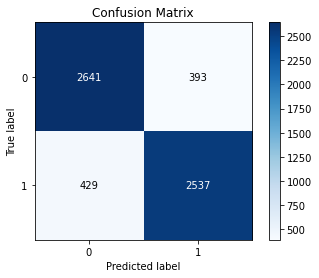

Accuracy: 0.863000
Precision: 0.865870
Recall: 0.855361
F1 Score: 0.860583


In [ ]:
import scikitplot as skplt

accuracytf_S = accuracy_score(ytf_test, ytf_pred_s) # checking accuracy

 

precisiontf_S = precision_score(ytf_test, ytf_pred_s)# checking precision

 

recalltf_S = recall_score(ytf_test, ytf_pred_s) # checking recall

 

f1tf_S = f1_score(ytf_test, ytf_pred_s)# checking f1 score

 

# Make the Confusion Matrix

 

skplt.metrics.plot_confusion_matrix(ytf_test, ytf_pred_s) # plotting confusion matrix
plt.show()

 

# Evaluate the results

 

print('Accuracy: %f' % accuracytf_S)
print('Precision: %f' % precisiontf_S)
print('Recall: %f' % recalltf_S)
print('F1 Score: %f' % f1tf_S)


In [ ]:
from sklearn.ensemble import RandomForestClassifier # importing "Random Forest classifier"
  
modeltf_Rf = RandomForestClassifier() # initiating "Random Forest classifier"
modeltf_Rf.fit(Xtf_tr, ytf_tr)# fitting Train data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
ytf_pred_rf = modeltf_Rf.predict(Xtf_test)# predicting for test data

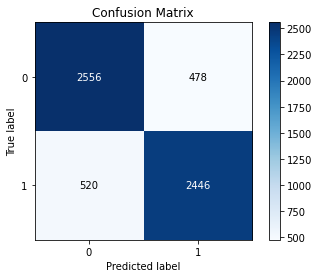

Accuracy: 0.833667
Precision: 0.836525
Recall: 0.824680
F1 Score: 0.830560


In [ ]:
accuracytf_rf = accuracy_score(ytf_test, ytf_pred_rf) # checking accuracy

 

precisiontf_rf = precision_score(ytf_test, ytf_pred_rf) # checking precision

 

recalltf_rf = recall_score(ytf_test, ytf_pred_rf) # checking recall

 

f1tf_rf = f1_score(ytf_test, ytf_pred_rf) # checking f1 score

 

# Make the Confusion Matrix

 

skplt.metrics.plot_confusion_matrix(ytf_test, ytf_pred_rf) # plotting confusion matrix
plt.show()

 

# Evaluate the results

 

print('Accuracy: %f' % accuracytf_rf)
print('Precision: %f' % precisiontf_rf)
print('Recall: %f' % recalltf_rf)
print('F1 Score: %f' % f1tf_rf)

In [ ]:
from sklearn.tree import DecisionTreeClassifier # importing "Decision Tree Classifier"
 
modeltf_D = DecisionTreeClassifier() # initiating Decision Tree Classifier classifier
modeltf_D.fit(Xtf_tr, ytf_tr) # fitting Train data

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
ytf_pred_d = modeltf_D.predict(Xtf_test) # predicting for test data

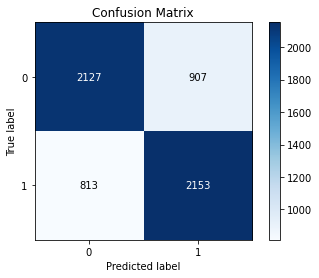

Accuracy: 0.713333
Precision: 0.703595
Recall: 0.725893
F1 Score: 0.714570


In [ ]:
accuracytf_d = accuracy_score(ytf_test, ytf_pred_d) # checking accuracy

 

precisiontf_d = precision_score(ytf_test, ytf_pred_d) # checking precision

 

recalltf_d = recall_score(ytf_test, ytf_pred_d) # checking recall

 

f1tf_d = f1_score(ytf_test, ytf_pred_d) # checking f1 score

 

# Make the Confusion Matrix

 

skplt.metrics.plot_confusion_matrix(ytf_test, ytf_pred_d) # plotting confusion matrix
plt.show()

 

# Evaluate the results

 

print('Accuracy: %f' % accuracytf_d)
print('Precision: %f' % precisiontf_d)
print('Recall: %f' % recalltf_d)
print('F1 Score: %f' % f1tf_d)

In [ ]:
Xtf_tr1,Xtf_test_1,ytf_tr1,ytf_test_1 = train_test_split(X_tf,y_tf,test_size=0.30,random_state=100)

#Splitting data to train and test 

In [ ]:
Xtf_tr1 = Xtf_tr1.toarray() # converting to array

In [ ]:
Xtf_test_1 = Xtf_test_1.toarray() # converting to array

In [ ]:
from sklearn.naive_bayes import GaussianNB # importing "Naive bayes Classifier"

modeltf_N = GaussianNB() # initiating Naive bayes classifier
modeltf_N.fit(Xtf_tr1,ytf_tr1)  # fitting Train data

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
ytf_pred_nb = modeltf_N.predict(Xtf_test_1)  # predicting for test data

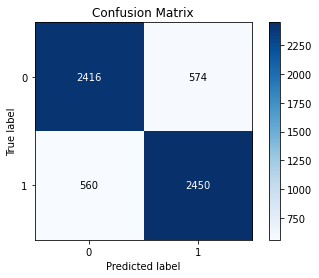

Accuracy: 0.811000
Precision: 0.810185
Recall: 0.813953
F1 Score: 0.812065


In [ ]:
accuracytf_n = accuracy_score(ytf_test_1, ytf_pred_nb) # checking accuracy

 
precisiontf_n = precision_score(ytf_test_1, ytf_pred_nb) # checking precision

 

recalltf_n = recall_score(ytf_test_1, ytf_pred_nb) # checking recall

 

f1tf_n = f1_score(ytf_test_1, ytf_pred_nb) # checking f1 score

 

# Make the Confusion Matrix

 

skplt.metrics.plot_confusion_matrix(ytf_test_1, ytf_pred_nb) # plotting confusion matrix
plt.show()

 

# Evaluate the results

 

print('Accuracy: %f' % accuracytf_n)
print('Precision: %f' % precisiontf_n)
print('Recall: %f' % recalltf_n)
print('F1 Score: %f' % f1tf_n)

In [ ]:
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print('************************************')
print(sno.stem('tasty'))

************************************
tasti


In [ ]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 500k sentences.
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in n1['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stopwords):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (n1['Positivity'].values)[i] == 1: 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(n1['Positivity'].values)[i] == 0:
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [ ]:
all_positive_words

[b'nylabon',
 b'durabl',
 b'chew',
 b'great',
 b'power',
 b'chewer',
 b'like',
 b'dog',
 b'realli',
 b'safeti',
 b'product',
 b'problem',
 b'not',
 b'realiz',
 b'buy',
 b'pet',
 b'product',
 b'get',
 b'free',
 b'ship',
 b'order',
 b'dvds',
 b'cds',
 b'end',
 b'pay',
 b'doubl',
 b'bone',
 b'could',
 b'purchas',
 b'regular',
 b'store',
 b'less',
 b'would',
 b'nice',
 b'could',
 b'sort',
 b'warn',
 b'hint',
 b'rule',
 b'exsist',
 b'would',
 b'purchas',
 b'live',
 b'learn',
 b'still',
 b'get',
 b'flavor',
 b'fulli',
 b'caffein',
 b'green',
 b'tea',
 b'green',
 b'clean',
 b'refresh',
 b'not',
 b'bitter',
 b'long',
 b'pull',
 b'tea',
 b'bag',
 b'min',
 b'forgiven',
 b'longer',
 b'steep',
 b'well',
 b'flavor',
 b'warm',
 b'mellow',
 b'grassi',
 b'tone',
 b'grassi',
 b'tone',
 b'not',
 b'overwhelm',
 b'light',
 b'tea',
 b'that',
 b'good',
 b'cold',
 b'well',
 b'ill',
 b'sometim',
 b'put',
 b'bag',
 b'cold',
 b'tea',
 b'flavor',
 b'water',
 b'delici',
 b'without',
 b'ad',
 b'heat',
 b'summer',


### In below code i have pickled all the positive and negative words 

In [ ]:
import pickle
with open('positive_words.pkl', 'wb') as f:
  pickle.dump(all_positive_words, f)

In [ ]:
import pickle
with open('negative_words.pkl', 'wb') as f:
  pickle.dump(all_negative_words, f)

In [ ]:
with open('positive_words.pkl', 'rb') as f:

  pos_words = pickle.load(f)

In [ ]:
p=pos_words # assigend to a variable p

In [ ]:
len(p)

384011

In [ ]:
pos = pd.DataFrame(p,columns=['positive_words']) # creating a dataframe of positive words

In [ ]:
pos # checking dataframe

,positive_words
0,b'nylabon'
1,b'durabl'
2,b'chew'
3,b'great'
4,b'power'
...,...
384006,b'one'
384007,b'color'
384008,b'look'
384009,b'great'


In [ ]:
str(pos['positive_words'].values) # converting the datatype to string

"[b'nylabon' b'durabl' b'chew' ... b'look' b'great' b'buffet']"

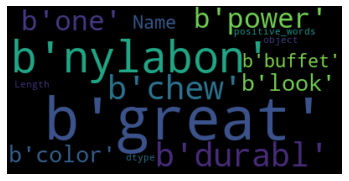

In [ ]:
# Start with one review:
text1 = str(pos['positive_words'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

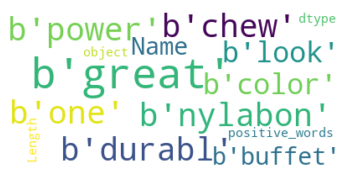

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
with open('negative_words.pkl', 'rb') as f:

  neg_words = pickle.load(f)

In [ ]:
neg = pd.DataFrame(neg_words,columns=['negative_words'])

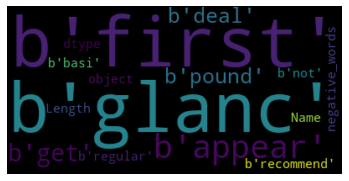

In [ ]:
# Start with one review:
text2 = str(neg['negative_words'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

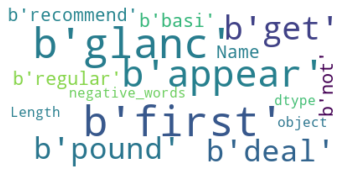

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
nn = pd.read_csv('new_reviews.csv')

In [ ]:
nn.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positivity,Cleaned_text
0,0,468690,B002GWHDZA,ADYZC5B1QMSEY,saw110352,0,1,2,1322438400,mis leading,At first glance it appears that you will be ge...,0,first glanc appear get pound coffe ship weight...
1,1,407530,B00434CB74,A2Q61WN71B1MR5,old student,1,12,2,1304553600,Red Star Champagne Yeast (10 Packs) Dried Yeast,I purchased this product through Amazon to res...,0,purchas product amazon restart ferment process...
2,2,119522,B0041LHND6,A17206I6DKR09B,"Paula Dawson ""Paula""",0,3,5,1255910400,excellent but expensive,The Nylabone durable chew is great for power c...,1,nylabon durabl chew great power chewer like do...
3,3,143912,B002HFLDJ8,A13HRSMJ5TOWEZ,IrishFire,0,0,5,1313366400,This is my favorite decaf green!,You can still get more flavor in a fully caffe...,1,still get flavor fulli caffein green tea green...
4,4,202424,B002VL66C2,A24WXGEQFWMOBJ,"M. Johnson ""delight""",1,1,5,1263340800,Great mints. The power is worth the price!,"Bendicks bittermints are delicious, and the co...",1,bendick bittermint delici combin chocol mint a...


![2.PNG](attachment:2.PNG)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Kmeans clustering

In [ ]:
from sklearn.cluster import KMeans # importing Kmeans clustering
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=100)

X = tf_idf_vect.fit_transform(nn['Cleaned_text'].values)

In [ ]:
X.shape

(20000, 1268)

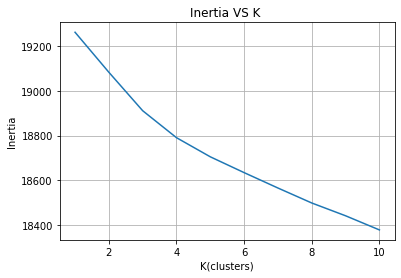

In [ ]:

k=[1,2,3,4,5,6,7,8,9,10] # list of K values
inertia=[] # within sum of squares
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(X)
    inertia.append(model.inertia_)
#finding best k using elbow method    
plt.plot(k, inertia)
plt.xlabel('K(clusters)')
plt.ylabel('Inertia')
plt.title('Inertia VS K ')
plt.grid()
plt.show()

In [ ]:

#we can see that at k=3 there is a point of inflection
model=KMeans(n_clusters=3) # initiating K-emnas for K=3
model.fit(X) # fitting X values


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cluster1,cluster2,cluster3=[],[],[] # creating 3 empty lists 

# Below code will save text of each words in the cluster.
for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1.append(nn['Cleaned_text'][i])
    elif model.labels_[i] == 1:
        cluster2.append(nn['Cleaned_text'][i])
    else:
        cluster3.append(nn['Cleaned_text'][i])

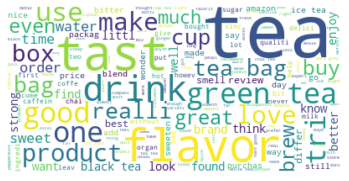

In [ ]:
#for cluster 1 we are printing word cloud
data=''
for i in cluster1:
    data+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


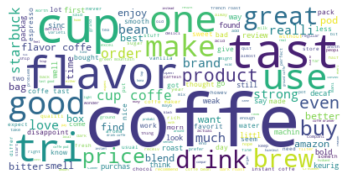

In [ ]:
 #for cluster 2 we are printing word cloud
data=''
for i in cluster2:
    data+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

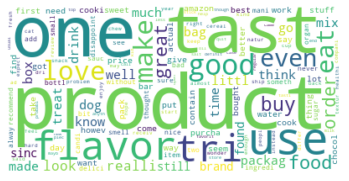

In [ ]:
#for cluster 3 we are printing word cloud
data=''
for i in cluster3:
    data+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#https://stackoverflow.com/questions/47452119/kmean-clustering-top-terms-in-cluster
print("Top 5 terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tf_idf_vect.get_feature_names()
for i in range(3):
    print("Cluster %d:" % (i+1), end='')
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind], end='')
        print()
    print('-'*50)

Top 5 terms per cluster:
Cluster 1: tea
 tast
 flavor
 green tea
 green
--------------------------------------------------
Cluster 2: coffe
 cup
 tast
 flavor
 not
--------------------------------------------------
Cluster 3: not
 tast
 product
 like
 good
--------------------------------------------------
